In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
# 数据是否需要标准化
scale = False

In [10]:
# load data
data = np.genfromtxt('LR-testSet.csv',delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

print(np.shape(x_data))
print(np.shape(y_data))

(100, 2)
(100,)


In [4]:
def plot():
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    
    # split
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
            
    # plot 
    scatter0 = plt.scatter(x0, y0, c='b',marker='o')
    scatter1 = plt.scatter(x1, y1, c='r',marker='x')
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')

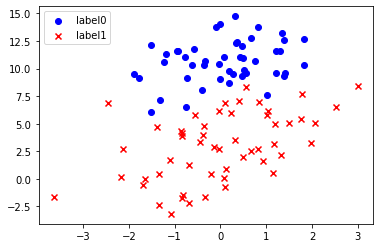

In [5]:
plot()

In [6]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

LogisticRegression()

In [7]:
print(logistic.coef_[0])

[ 0.85767013 -1.54232428]


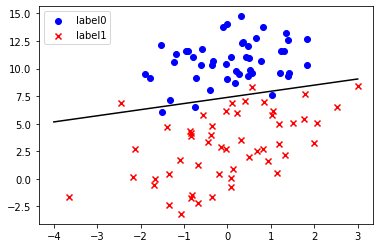

In [9]:
if scale == False:
    plot()    
    # plot
    x_test = np.array([[-4],[3]])
    y_test = (-logistic.intercept_ - x_test*logistic.coef_[0][0])/logistic.coef_[0][1]
    plt.plot(x_test, y_test, 'k')
    plt.show()

In [11]:
predictions = logistic.predict(x_data)

In [12]:
print(classification_report(y_data,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.94      0.96      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

